In [89]:
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
print(data)


        Exam1      Exam2  Pass
0   34.623660  78.024693     0
1   30.286711  43.894998     0
2   35.847409  72.902198     0
3   60.182599  86.308552     1
4   79.032736  75.344376     1
..        ...        ...   ...
95  83.489163  48.380286     1
96  42.261701  87.103851     1
97  99.315009  68.775409     1
98  55.340018  64.931938     1
99  74.775893  89.529813     1

[100 rows x 3 columns]


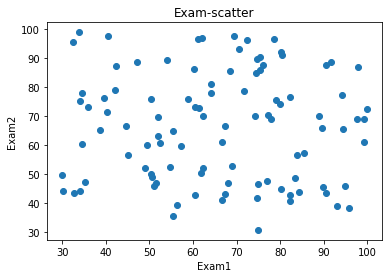

In [90]:
from matplotlib import pyplot as plot

fig1 = plot.figure()
data_exam1 = data.loc[:,'Exam1']
data_exam2 = data.loc[:,'Exam2']
data_plot = plot.scatter(data_exam1,data_exam2)
plot.title('Exam-scatter')
plot.xlabel('Exam1')
plot.ylabel('Exam2')
plot.show()


In [91]:
# 根据是否等于1判断是否通过，并且保存值到mask变量中
mask = data.loc[:,'Pass'] !=1
print(mask)

0      True
1      True
2      True
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Pass, Length: 100, dtype: bool


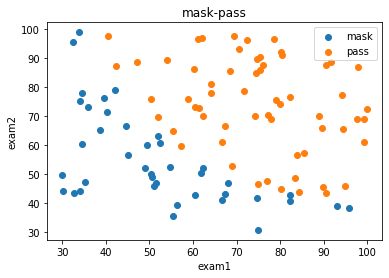

In [92]:
fig2 = plot.figure()
mask_plot = plot.scatter(data_exam1[mask],data_exam2[mask])
pass_plot = plot.scatter(data_exam1[~mask],data_exam2[~mask])
plot.title('mask-pass')
plot.xlabel('exam1')
plot.ylabel('exam2')
plot.legend((mask_plot,pass_plot),('mask','pass'))
plot.show()

In [93]:
x = data.drop(['Pass'],axis=1)
y = data.loc[:,'Pass']
print(x,y)

        Exam1      Exam2
0   34.623660  78.024693
1   30.286711  43.894998
2   35.847409  72.902198
3   60.182599  86.308552
4   79.032736  75.344376
..        ...        ...
95  83.489163  48.380286
96  42.261701  87.103851
97  99.315009  68.775409
98  55.340018  64.931938
99  74.775893  89.529813

[100 rows x 2 columns] 0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Pass, Length: 100, dtype: int64


In [94]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
# show the predicted result and its accuracy
y_predict = LogR.predict(x)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [96]:
# 导入准确率进行比较
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(y,y_predict)
print(accuracy)

0.89


In [97]:
y_test = [[70,65]]
y_predict_result = LogR.predict(y_test)
print('passed' if y_predict_result==1 else 'failed')

passed


In [98]:
print(LogR.coef_)
print(LogR.intercept_)
thita0 = LogR.intercept_
thita1,thita2 = LogR.coef_[0][0],LogR.coef_[0][1]
print(thita0,thita1,thita2)



[[0.20535491 0.2005838 ]]
[-25.05219314]
[-25.05219314] 0.20535491217790372 0.20058380395469033


0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


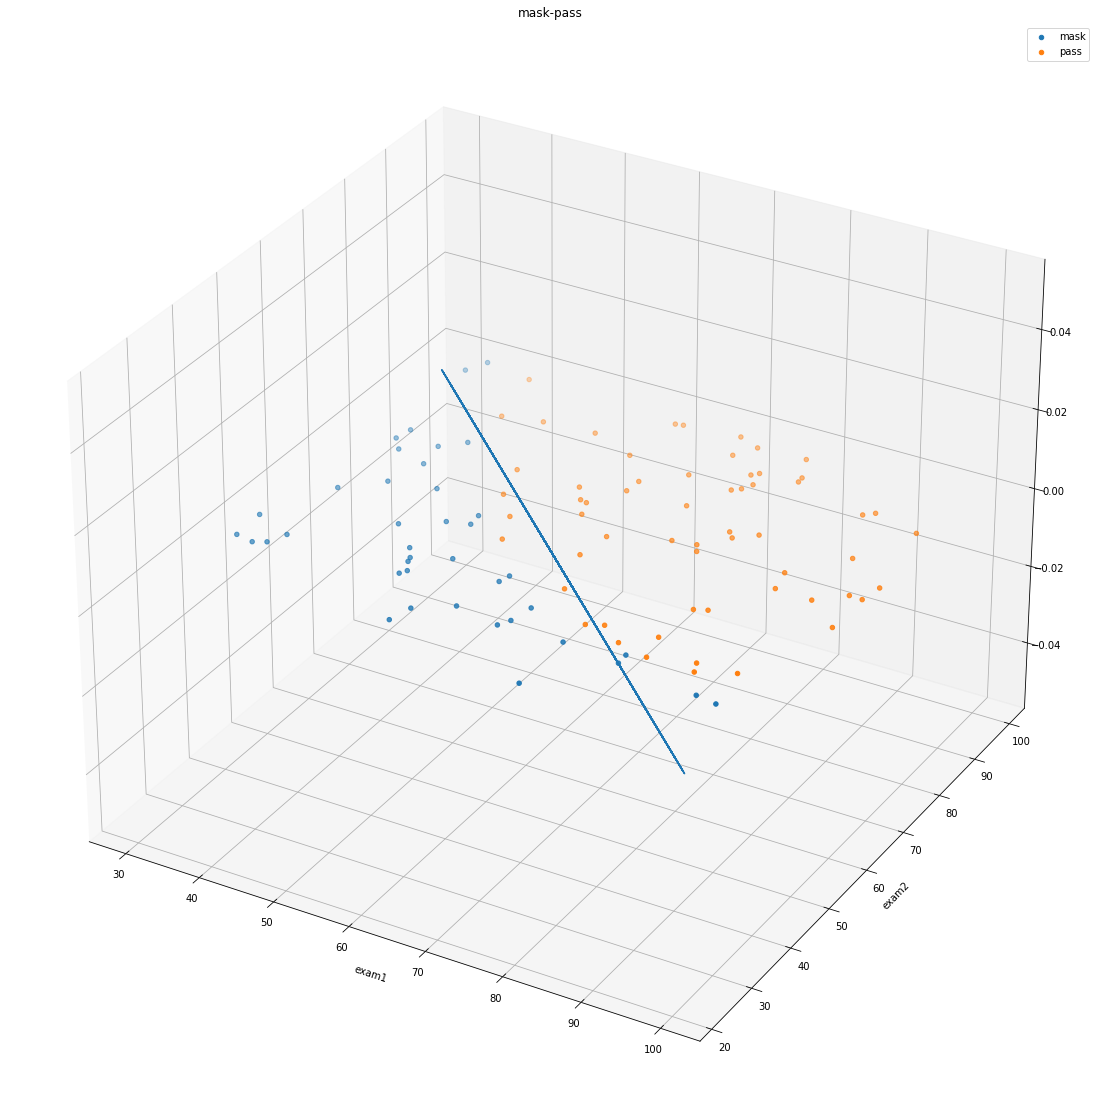

In [99]:
x2_new = -(thita0+thita1*data_exam1)/thita2
print(x2_new)
fig3 = plot.figure(figsize=(20,20)).gca(projection='3d')
fig3.plot(data_exam1,x2_new)
mask_plot = fig3.scatter(data_exam1[mask],data_exam2[mask])
pass_plot = fig3.scatter(data_exam1[~mask],data_exam2[~mask])
plot.title('mask-pass')
plot.xlabel('exam1')
plot.ylabel('exam2')
fig3.legend((mask_plot,pass_plot),('mask','pass'))
plot.show()

In [100]:
#create new data 
x1_2 = data_exam1**2
x2_2 = data_exam2**2
x1_x2 = data_exam1*data_exam2
print(x1_2,x1_x2)
x_new = {'x1':data_exam1,'x2':data_exam2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}


0     1198.797805
1      917.284849
2     1285.036716
3     3621.945269
4     6246.173368
         ...     
95    6970.440295
96    1786.051355
97    9863.470975
98    3062.517544
99    5591.434174
Name: Exam1, Length: 100, dtype: float64 0     2701.500406
1     1329.435094
2     2613.354893
3     5194.273015
4     5954.672216
         ...     
95    4039.229555
96    3681.156888
97    6830.430397
98    3593.334590
99    6694.671710
Length: 100, dtype: float64


In [101]:
x_new =pd.DataFrame(x_new)
data_exam1_sort = data_exam1.sort_values()
data_exam2_sort = data_exam2.sort_values()
print(x_new)
print(data_exam1_sort,data_exam2_sort)

           x1         x2         x1_2         x2_2        x1_x2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  6970.440295  2340.652054  4039.229555
96  42.261701  87.103851  1786.051355  7587.080849  3681.156888
97  99.315009  68.775409  9863.470975  4730.056948  6830.430397
98  55.340018  64.931938  3062.517544  4216.156574  3593.334590
99  74.775893  89.529813  5591.434174  8015.587398  6694.671710

[100 rows x 5 columns]
63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype:

In [102]:
LR2 = LogisticRegression()
LR2.fit(x_new,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y2_predict  = LR2.predict(x_new)
accuracy2 = accuracy_score(y,y2_predict)
# print(accuracy2)
intercept = LR2.intercept_[0]
thita = (LR2.coef_)[0]
# x1_new = x1.sort_values()
# print(data_exam1_sort,data_exam1)
a = thita[3]
b = thita[4]*data_exam1_sort+thita[1]
c = intercept+thita[0]*data_exam1_sort+thita[2]**2 
# print(a,b,c)
x2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(x2_new_boundary)

63    131.837938
1     130.623481
57    119.074703
70    118.381392
36    112.889512
         ...    
56     38.377531
47     38.352110
51     38.056213
97     38.048022
75     37.949910
Name: Exam1, Length: 100, dtype: float64


In [104]:
print(data_exam1_sort)

63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype: float64


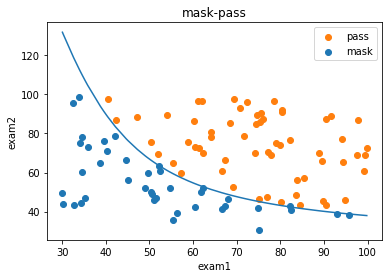

In [105]:
fig4 =plot.figure()
mask_plot=plot.scatter(data_exam1[mask],data_exam2[mask])
pass_plot=plot.scatter(data_exam1[~mask],data_exam2[~mask])
plot.title('mask-pass')
plot.xlabel('exam1')
plot.ylabel('exam2')
plot.legend((pass_plot,mask_plot),('pass','mask'))
plot.plot(data_exam1_sort,x2_new_boundary)
plot.show()